Geometric Brownian Motion Simulation
Parameters: μ=0.08, σ=0.2, S₀=100
Time horizon: 2 years
Number of paths: 10
Steps per path: 252

1. Using Euler-Maruyama method:


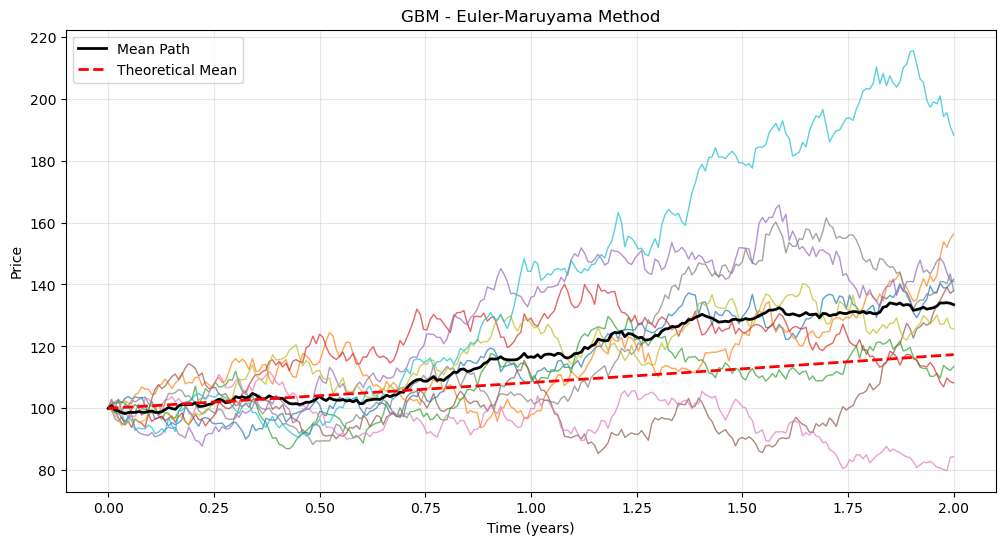

2. Using analytical solution:


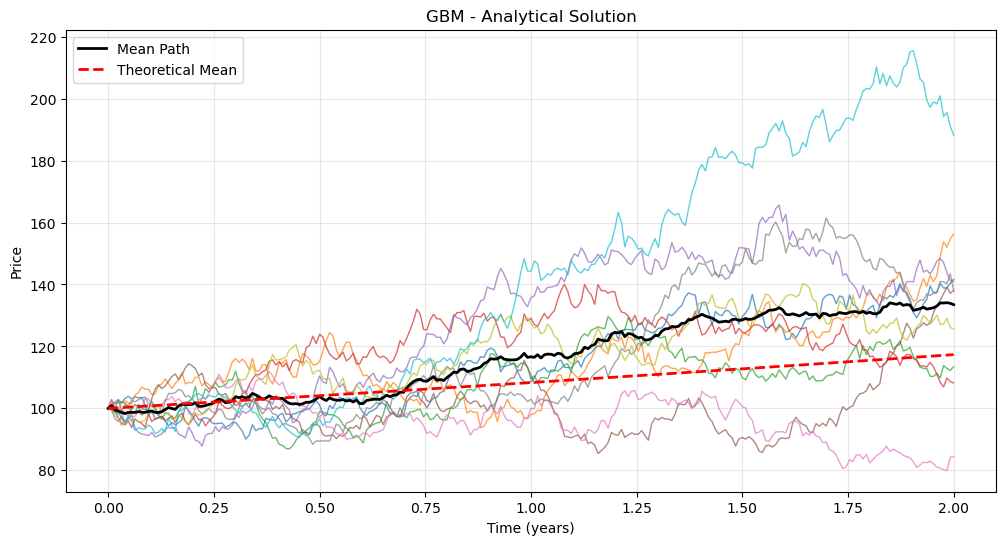


Statistical Analysis of Final Prices:
Mean final price: $133.47
Theoretical mean: $117.35
Standard deviation: $26.82
Minimum final price: $84.38
Maximum final price: $188.23

Comparison of methods:
Mean absolute difference: 0.000000

3. Single path with confidence intervals:


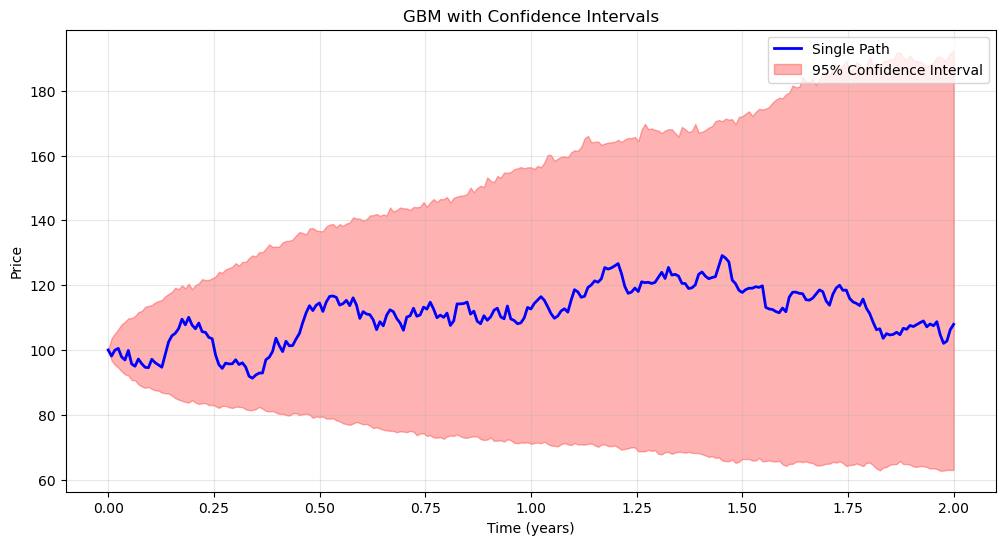

In [ ]:
# geometric brownian motion simulation (GBM)

import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Union

class GeometricBrownianMotion:
    """
    A class to model Geometric Brownian Motion (GBM)
    
    GBM follows the stochastic differential equation:
    dS_t = μS_t dt + σS_t dW_t
    
    where:
    - S_t is the stock price at time t
    - μ is the drift coefficient
    - σ is the volatility coefficient
    - W_t is a Wiener process (Brownian motion)
    """
    
    def __init__(self, mu: float, sigma: float, s0: float = 100.0):
        """
        Initialize GBM parameters
        
        Parameters:
        -----------
        mu : float
            Drift coefficient (annualized)
        sigma : float
            Volatility coefficient (annualized)
        s0 : float
            Initial stock price
        """
        self.mu = mu
        self.sigma = sigma
        self.s0 = s0
    
    def simulate(self, T: float = 1.0, n_steps: int = 252, n_paths: int = 1, 
                 random_seed: Optional[int] = None) -> np.ndarray:
        """
        Simulate GBM paths
        
        Parameters:
        -----------
        T : float
            Time horizon in years
        n_steps : int
            Number of time steps (typically trading days)
        n_paths : int
            Number of simulation paths
        random_seed : int, optional
            Random seed for reproducibility
            
        Returns:
        --------
        paths : np.ndarray
            Array of shape (n_steps + 1, n_paths) containing simulated paths
        """
        if random_seed is not None:
            np.random.seed(random_seed)
        
        # Time grid
        dt = T / n_steps
        times = np.linspace(0, T, n_steps + 1)
        
        # Initialize paths array
        paths = np.zeros((n_steps + 1, n_paths))
        paths[0] = self.s0
        
        # Generate Brownian increments
        dW = np.random.normal(0, np.sqrt(dt), (n_steps, n_paths))
        
        # Simulate using Euler-Maruyama scheme
        for t in range(1, n_steps + 1):
            paths[t] = paths[t-1] * np.exp((self.mu - 0.5 * self.sigma**2) * dt + 
                                          self.sigma * dW[t-1])
        
        return paths
    
    def analytical_solution(self, T: float = 1.0, n_steps: int = 252, 
                           n_paths: int = 1, random_seed: Optional[int] = None) -> np.ndarray:
        """
        Generate GBM paths using the analytical solution
        
        The analytical solution is:
        S_t = S_0 * exp((μ - σ²/2)t + σW_t)
        
        Parameters:
        -----------
        T : float
            Time horizon in years
        n_steps : int
            Number of time steps
        n_paths : int
            Number of simulation paths
        random_seed : int, optional
            Random seed for reproducibility
            
        Returns:
        --------
        paths : np.ndarray
            Array of shape (n_steps + 1, n_paths) containing simulated paths
        """
        if random_seed is not None:
            np.random.seed(random_seed)
        
        # Time grid
        dt = T / n_steps
        times = np.linspace(0, T, n_steps + 1)
        
        # Generate Brownian motion
        dW = np.random.normal(0, np.sqrt(dt), (n_steps, n_paths))
        W = np.cumsum(dW, axis=0)
        W = np.vstack([np.zeros((1, n_paths)), W])
        
        # Analytical solution
        paths = self.s0 * np.exp((self.mu - 0.5 * self.sigma**2) * times.reshape(-1, 1) + 
                                self.sigma * W)
        
        return paths


def plot_gbm_paths(paths: np.ndarray, T: float = 1.0, title: str = "Geometric Brownian Motion"):
    """
    Plot GBM paths
    
    Parameters:
    -----------
    paths : np.ndarray
        Array of GBM paths
    T : float
        Time horizon
    title : str
        Plot title
    """
    n_steps = paths.shape[0] - 1
    times = np.linspace(0, T, n_steps + 1)
    
    plt.figure(figsize=(12, 6))
    
    # Plot individual paths
    for i in range(paths.shape[1]):
        plt.plot(times, paths[:, i], alpha=0.7, linewidth=1)
    
    # Plot mean path
    mean_path = np.mean(paths, axis=1)
    plt.plot(times, mean_path, 'k-', linewidth=2, label='Mean Path')
    
    # Plot theoretical mean
    theoretical_mean = paths[0, 0] * np.exp(mu * times)
    plt.plot(times, theoretical_mean, 'r--', linewidth=2, label='Theoretical Mean')
    
    plt.xlabel('Time (years)')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage and demonstration
if __name__ == "__main__":
    # GBM parameters (typical stock parameters)
    mu = 0.08      # 8% annual drift
    sigma = 0.2    # 20% annual volatility
    s0 = 100       # Initial price $100
    T = 2          # 2 years
    n_steps = 252  # Daily steps (assuming 252 trading days per year)
    n_paths = 10   # Number of simulation paths
    
    # Create GBM model
    gbm = GeometricBrownianMotion(mu=mu, sigma=sigma, s0=s0)
    
    print("Geometric Brownian Motion Simulation")
    print(f"Parameters: μ={mu}, σ={sigma}, S₀={s0}")
    print(f"Time horizon: {T} years")
    print(f"Number of paths: {n_paths}")
    print(f"Steps per path: {n_steps}")
    
    # Method 1: Euler-Maruyama simulation
    print("\n1. Using Euler-Maruyama method:")
    paths_euler = gbm.simulate(T=T, n_steps=n_steps, n_paths=n_paths, random_seed=42)
    plot_gbm_paths(paths_euler, T=T, title="GBM - Euler-Maruyama Method")
    
    # Method 2: Analytical solution
    print("2. Using analytical solution:")
    paths_analytical = gbm.analytical_solution(T=T, n_steps=n_steps, n_paths=n_paths, random_seed=42)
    plot_gbm_paths(paths_analytical, T=T, title="GBM - Analytical Solution")
    
    # Statistical analysis of final prices
    final_prices = paths_analytical[-1, :]
    log_returns = np.log(final_prices / s0)
    
    print(f"\nStatistical Analysis of Final Prices:")
    print(f"Mean final price: ${np.mean(final_prices):.2f}")
    print(f"Theoretical mean: ${s0 * np.exp(mu * T):.2f}")
    print(f"Standard deviation: ${np.std(final_prices):.2f}")
    print(f"Minimum final price: ${np.min(final_prices):.2f}")
    print(f"Maximum final price: ${np.max(final_prices):.2f}")
    
    # Compare the two methods
    print(f"\nComparison of methods:")
    print(f"Mean absolute difference: {np.mean(np.abs(paths_euler - paths_analytical)):.6f}")
    
    # Single path with confidence intervals
    print("\n3. Single path with confidence intervals:")
    single_path = gbm.analytical_solution(T=T, n_steps=n_steps, n_paths=1, random_seed=123)
    
    # Multiple paths for confidence intervals
    many_paths = gbm.analytical_solution(T=T, n_steps=n_steps, n_paths=1000, random_seed=456)
    
    times = np.linspace(0, T, n_steps + 1)
    plt.figure(figsize=(12, 6))
    
    # Plot single path
    plt.plot(times, single_path, 'b-', linewidth=2, label='Single Path')
    
    # Plot confidence intervals
    lower_95 = np.percentile(many_paths, 2.5, axis=1)
    upper_95 = np.percentile(many_paths, 97.5, axis=1)
    plt.fill_between(times, lower_95, upper_95, alpha=0.3, color='red', label='95% Confidence Interval')
    
    plt.xlabel('Time (years)')
    plt.ylabel('Price')
    plt.title('GBM with Confidence Intervals')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()